In [ ]:
import os
home = os.getcwd()
os.chdir(home + "/LFM/imaging")


In [ ]:
import os
os.getcwd()

In [1]:
from reconstruction import reconstruct_vols_from_imgs
from i_o import Paths
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os, glob, h5py
import importlib, pathlib
from daio.h5 import lazyh5
from video import create_projection_image, recording_to_overlay_preview, showvid, get_lenses

cmap = "gray"

In [6]:
# pn_psf = r"Y:/hpc/r/lfm2025/psfs"
pn_psfs = r"~/hpc-rw/lfm/psfs"
includes = ['']
excludes = []

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_psfs, '*'))), reverse=True) if os.path.exists(os.path.join(pn_psfs, rec, 'psf.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250701_1216_PSF_LB_noap_1
20250610_1636_PSF_LB_30k_wo_coverslip_1
20250530_1330_PSF_LB_redFB_1-30K_dim_isolated
20250509_1646_PSF_LB_redFB_1_30K_wo_coverslip_1
20250425_1320_PSF_LB_redFB_1-10000_2d_without_coverslip_3


In [7]:
pn_bg = r"~/hpc-rw/lfm/bg"
for file in pathlib.Path(os.path.expanduser(pn_bg)).iterdir():
    if file.is_file():
        print(file.name)

20250602_1753_LB_bg_200s_100laser_2fps.npy
20250701_1651_LB_bg_40fps.h5
20250602_1749_LB_bg_100s.h5
20250602_1749_LB_bg_100s_100laser_2fps.npy
20250611_1508_LB_80fps_100laser_bg.npy
20250610_1904_LB_30k_wo_coverslip_1_bg.h5
20250602_1753_LB_bg_200s.npy
20250602_1749_LB_bg_100s.npy
20250701_1654_LB_bg_2fps.h5
20250611_1508_LB_40fps_100laser_bg.npy
20250701_1649_LB_bg_80fps.h5
20250701_1654_LB_bg_2fps.npy
20250610_1904_80laser_5fps.npy
20250610_1904_LB_30k_wo_coverslip_1_bg.npy
20250602_1753_LB_bg_200s.h5
20250611_1508_LB_40fps_100laser_bg.h5
20250701_1651_LB_bg_40fps.npy
20250611_1508_LB_80fps_100laser_bg.h5
20250701_1649_LB_bg_80fps.npy


In [2]:
# pn_rec = r"Y:/hpc/r/lfm2025/recordings"
pn_rec = r"~/hpc-r/lfm2025/recordings"
includes = ['']
excludes = ["bg"]

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_rec, '*'))), reverse=True) if os.path.exists(os.path.join(pn_rec, rec, 'data.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250701_1638_LB_ZF_v552_f7_40fps_tail
20250701_1636_LB_ZF_v552_f7_80fps_tail
20250701_1633_LB_ZF_v552_f7_80fps_3
20250701_1630_LB_ZF_v552_f7_80fps_2
20250701_1628_LB_ZF_v552_f7_80fps_1
20250701_1625_LB_ZF_v552_f7_40fps_2
20250701_1622_LB_ZF_v552_f7_40fps_1
20250701_1613_LB_ZF_v552_f6_80fps_2
20250701_1610_LB_ZF_v552_f6_80fps_1
20250701_1607_LB_ZF_v552_f6_40fps_2
20250701_1605_LB_ZF_v552_f6_40fps_1
20250701_1602_LB_ZF_v552_f6_40fps_tail2
20250701_1600_LB_ZF_v552_f6_40fps_tail
20250701_1547_LB_ZF_v552_f5_80fps_2
20250701_1544_LB_ZF_v552_f5_80fps_1
20250701_1541_LB_ZF_v552_f5_40fps_2
20250701_1538_LB_ZF_v552_f5_40fps_1
20250701_1522_LB_ZF_v552_f4_80fps_1
20250701_1520_LB_ZF_v552_f4_40fps_2
20250701_1516_LB_ZF_v552_f4_40fps_1
20250701_1503_LB_ZF_v552_f3_80fps_1
20250701_1501_LB_ZF_v552_f3_40fps_2
20250701_1458_LB_ZF_v552_f3_40fps_1
20250701_1444_LB_ZF_v552_f2_80fps_1
20250701_1441_LB_ZF_v552_f2_40fps_3
20250701_1438_LB_ZF_v552_f2_40fps_2
20250701_1435_LB_ZF_v552_f2_40fps_1
20250701_1409_L

In [3]:
pn_psfs = r"~/hpc-rw/lfm/psfs"
pn_rec = r"~/hpc-r/lfm2025/recordings"
pn_bg = r"~/hpc-rw/lfm/bg"
url_home = r"/home/lubo12/"
pn_out = r"~/hpc-rw/lfm/results"

dataset_name = "20250701_1501_LB_ZF_v552_f3_40fps_2"
psf_name = "20250701_1216_PSF_LB_noap_1"
bg_name = "20250701_1651_LB_bg_40fps.npy"

paths = Paths(dataset_name=dataset_name,
              psf_name = psf_name,
              bg_name=bg_name,
              pn_bg= pn_bg,
              pn_rec = pn_rec,
              pn_psfs=pn_psfs,
              pn_out=pn_out,
              url_home=url_home,
              )

(225, 2048, 2048)


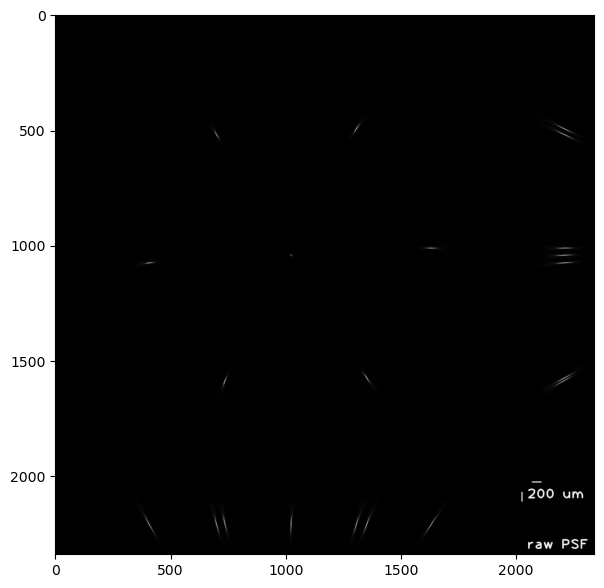

In [4]:
psf_f = lazyh5(paths.psf)
crop = np.array(psf_f["crop"])
mask = np.array(psf_f["circle_mask"][crop[0]:crop[1],crop[2]:crop[3]])
psf = np.array(psf_f["psf"])
zpos=np.array(psf_f["z_positions"])

print(psf.shape)

fig, ax = plt.subplots(1,1,figsize = (7,7))
ax.imshow(create_projection_image(psf, scalebar=200,zpos=zpos, text= "raw PSF", text_size=4), cmap='gray')
# ax[1].imshow(create_projection_image(psf["psf"]-bg,np.max,pad=10), cmap='binary')

In [ ]:
print(og_crop, og_crop[1]-og_crop[0],og_crop[3]-og_crop[2])
better_crop = os.path.expanduser(os.path.join(pn_psfs, "20250509_1646_PSF_LB_redFB_1_30K_wo_coverslip_1","psf.h5"))
with h5py.File(better_crop,"r") as f:
    crop = list(f["crop"])
    og_mask=np.array(f["circle_mask"])
print(crop, crop[1]-crop[0],crop[3]-crop[2])
plt.imshow(og_mask[crop[0]:crop[1],crop[2]:crop[3]])


In [ ]:
crop[0]=crop[0]-1
crop[2]=crop[2]-1
print(crop, crop[1]-crop[0],crop[3]-crop[2])
mask = og_mask[crop[0]:crop[1],crop[2]:crop[3]]

20250701_1501_LB_ZF_v552_f3_40fps_2


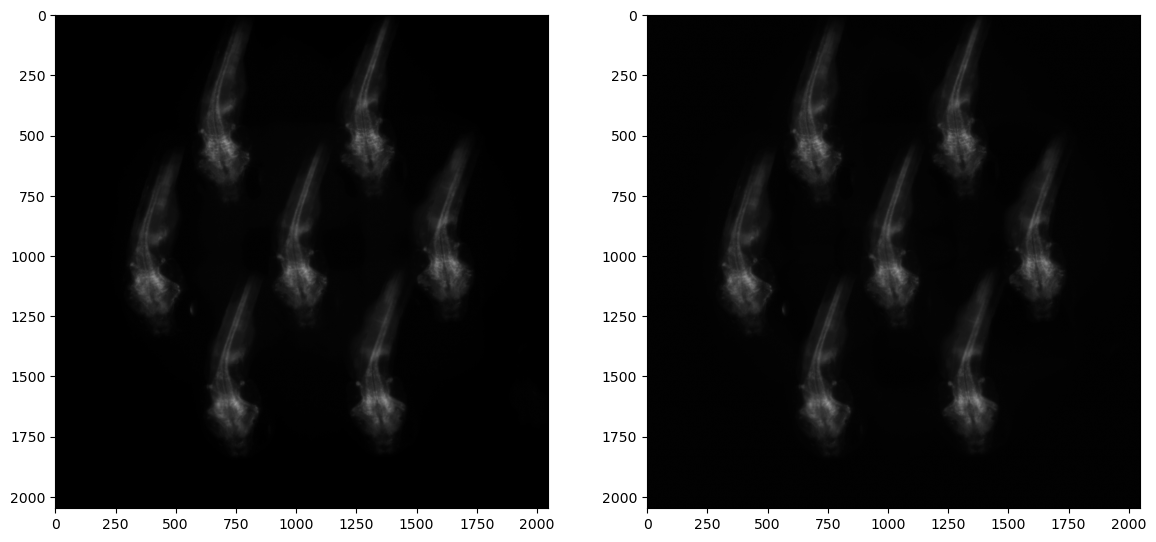

In [5]:
vmax=100

fig, ax = plt.subplots(1,2,figsize = (14,7))
bg = lazyh5(paths.bg)["data"][crop[0]:crop[1],crop[2]:crop[3]]
with h5py.File(paths.raw, "r") as f:
    ims = np.array(f["data"][25:50,crop[0]:crop[1],crop[2]:crop[3]])
im = ims[0]

ax[0].imshow(im, cmap = "gray",vmax=vmax)
ax[1].imshow((im-bg)*mask, cmap="gray",vmax=vmax)
print(dataset_name)

In [6]:
del data

In [ ]:
cx, cy, radii, masks = get_lenses(og_mask, radius_range=np.arange(525,535))

In [ ]:
cx=np.array(psf_f["ml_cx"])
cy=np.array(psf_f["ml_cy"])
radii=np.array(psf_f["ml_radii"])
masks=np.array(psf_f["ml_masks"])


In [ ]:
import video
importlib.reload(video)
from video import recording_to_overlay_preview, get_lenses, img_to_overlay_preview, showvid, get_projection_image
fn_vid, fn_file ,fn_dff_vid, fn_dff_file = recording_to_overlay_preview(paths,
                                                      cx,cy,padxy=300,masks=masks, 
                                                      fps=40, 
                                                      avg_method="median", median_avg_window =40, 
                                                      dff=True,
                                                      vmin=0,vmax=100,absolute_limits=False)
showvid(fn_vid)

Loading OTF from disk


Reconstructing volumes:   0%|          | 0/1 [00:00<?, ?it/s]

Deconvolving image 1/1:   0%|          | 0/45 [00:00<?, ?it/s]

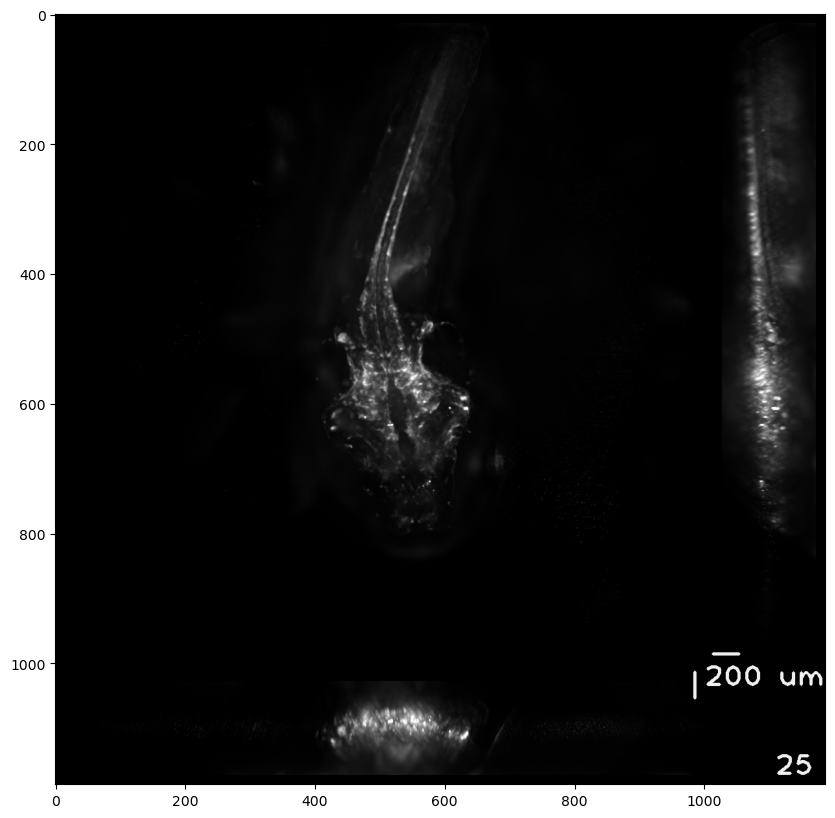

In [6]:
import reconstruction
importlib.reload(reconstruction)
from reconstruction import reconstruct_vols_from_imgs
img_idx = [25,26,1]
# print(f"PSF zspacing: {np.abs(np.diff(psf["z_positions"][::2])).mean()*1000} um")
objs, mips, losses, kwargs = reconstruct_vols_from_imgs(paths,
                                                        img_idx=img_idx,
                                                        crop = crop,
                                                        max_iter = 45,
                                                        roi_size=500,
                                                        loss_threshold=0,
                                                        reuse_prev_vol = False,
                                                        psf_downsample = [50,-30,1],
                                                        OTF_normalize=True,
                                                        OTF_clip=False,
                                                        img_subtract_bg=True,
                                                        img_mask=True,
                                                        plot_decon=True,
                                                        fully_batched=False,
                                                        vmin=0,
                                                        vmax=50,
                                                        absolute_limits=False
                                                        )
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(mips[0,-1,:,:],cmap="gray")

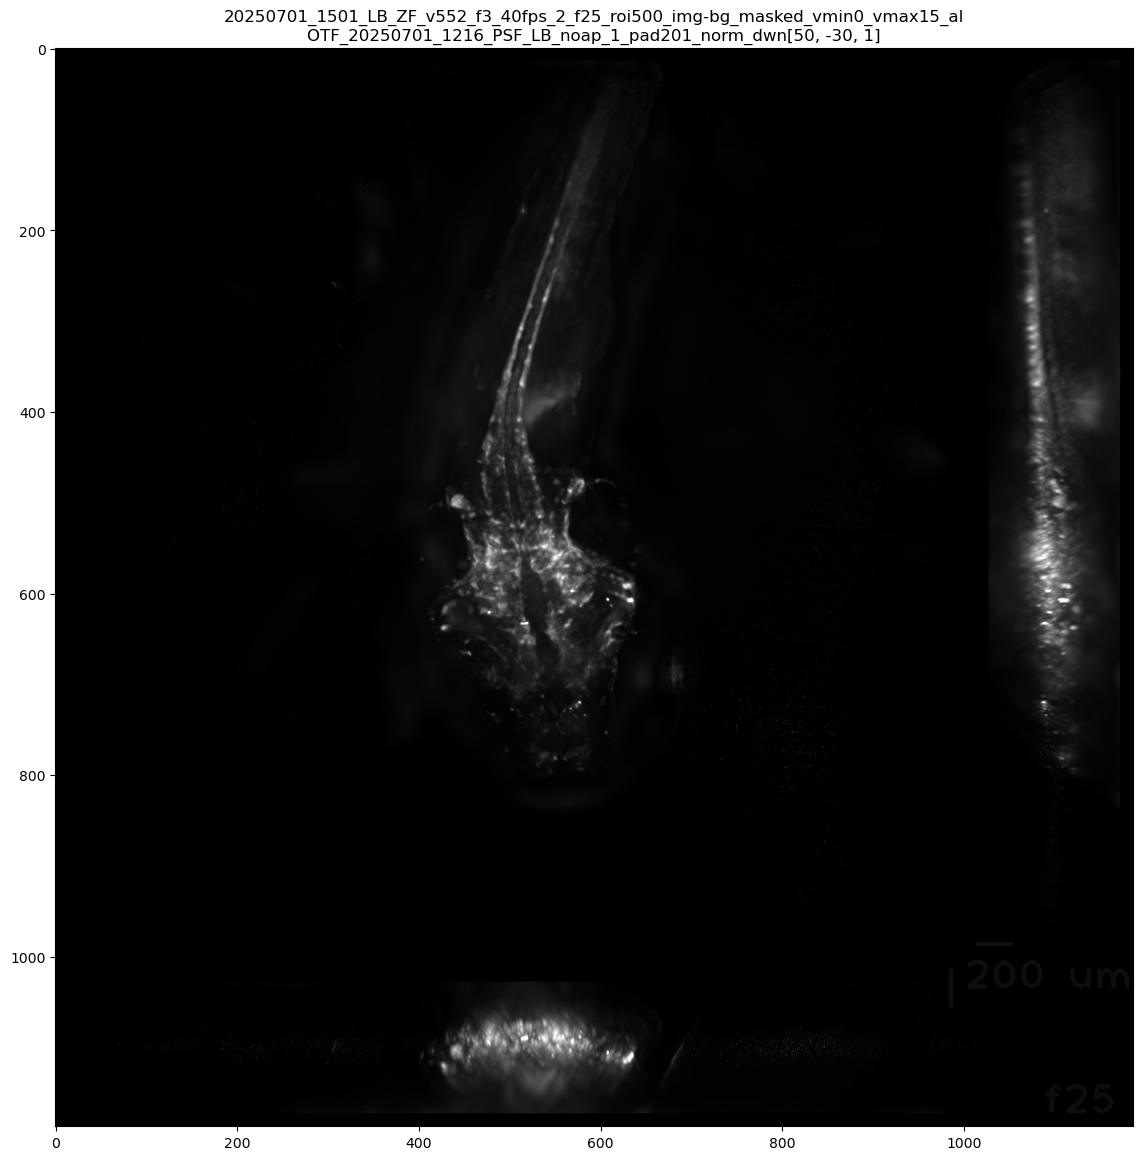

In [16]:
frame = 0

vmin=0
vmax=15
absolute_limits=True
_zpos = zpos[kwargs["psf_downsample"][0]:kwargs["psf_downsample"][1]:kwargs["psf_downsample"][2]] if kwargs["psf_downsample"] is not None else zpos


fig, ax = plt.subplots(1,1,figsize=(14,14))
ax.imshow(create_projection_image(objs[0], vmin=vmin, vmax=vmax, absolute_limits=absolute_limits, zpos = _zpos, scalebar=200, text = f"f{np.arange(*img_idx)[frame]}",),cmap = "gray")

title = f"f{np.arange(*img_idx)[frame]}_roi{kwargs["roi_size"]}_img{"-bg" if kwargs["img_subtract_bg"] else ""}{"_masked"if kwargs["img_mask"] else ""}_vmin{vmin}_vmax{vmax}{"_al" if absolute_limits else ""}"
otf_name = f"OTF_{paths.psf_name}_pad{kwargs["xy_pad"]}{"_clip" if kwargs["OTF_clip"] else ""}{"_norm" if kwargs["OTF_normalize"] else ""}{f'_dwn{kwargs["psf_downsample"]}' if kwargs["psf_downsample"] is not None else ''}"

ax.set_title(paths.dataset_name+"_"+title +"\n"+otf_name)
os.mkdir(os.path.join(paths.pn_outrec,"testmip")) if not os.path.exists(os.path.join(paths.pn_outrec,"testmip")) else None
fig.savefig(os.path.join(paths.pn_outrec,"testmip",f"{title}_{otf_name}.png"))

In [7]:
import video
importlib.reload(video)
import i_o
importlib.reload(i_o)
import reconstruction
importlib.reload(reconstruction)
from reconstruction import reconstruct_vols_from_imgs_parallel2
res = reconstruct_vols_from_imgs_parallel2(paths, **kwargs, verbose=1)

Loading OTF from disk
Setting up I/O queues
File exists but is not compatible, overwriting existing file.
GPU 0: Initializing Memory


GPU 0: Deconvolving image 1/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 2/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 3/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 4/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 5/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 6/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 7/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 8/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 9/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 10/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 11/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 12/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 13/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 14/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 15/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 16/3:   0%|          | 0/45 [00:00<?, ?it/s]

GPU 0: Deconvolving image 17/3:   0%|          | 0/45 [00:00<?, ?it/s]

KeyboardInterrupt: 

Exception in thread Exception in threading.excepthook:
Exception ignored in thread started by: <bound method Thread._bootstrap of <Thread(Thread-10 (gpu_worker_loop), stopped 22361215207168)>>
Traceback (most recent call last):
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/threading.py", line 1032, in _bootstrap
    self._bootstrap_inner()
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/threading.py", line 1077, in _bootstrap_inner
    self._invoke_excepthook(self)
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/threading.py", line 1391, in invoke_excepthook
    local_print("Exception in threading.excepthook:",
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/ipykernel/iostream.py", line 604, in flush
    self.pub_thread.schedule(self._flush)
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/z

Error in GPU worker 0: 
Traceback (most recent call last):
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/tqdm/notebook.py", line 262, in update
    return super().update(n=n)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/tqdm/std.py", line 1242, in update
    self.refresh(lock_args=self.lock_args)
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/tqdm/std.py", line 1347, in refresh
    self.display()
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/tqdm/notebook.py", line 157, in display
    pbar.value = self.n
    ^^^^^^^^^^
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/traitlets/traitlets.py", line 716, in __set__
    self.set(obj, value)
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/traitlets/traitlets.py", line 706, in set
    obj._notify_trait(self.name, old_value, new_value)
  File "/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-

In [ ]:
kwargs["write_mip_video"]=False
kwargs

In [ ]:
import slurm
importlib.reload(slurm)
from slurm import PythonExecutorSLURM
import reconstruction
importlib.reload(reconstruction)
from reconstruction import reconstruct_vols_from_imgs_parallel2
# kwargs, save_fn, vid_fn = reconstruct_vols_from_imgs_parallel(paths,img_idx=(3020,3025,1),write_mip_video=True,**kwargs)
# print(save_fn,"\n",vid_fn)


In [9]:
email = 'lukas.born@charite.de' 
#cmd_prefix = ['ssh', 'lubo12@s-sc-frontend1'] # if outside HPC (add your user name), otherwise: 
cmd_prefix = [] #if inside HPC
from slurm import PythonExecutorSLURM
slex = PythonExecutorSLURM(job_path=paths.pn_outrec, job_name='deconv'+paths.dataset_name, conda_env='lfm1',
                                     time="0-12:00", partition="pgpu", gres="gpu:4", cpus_per_task=16,mem='128G',ntasks=1,nodes=1,exclude="s-sc-pgpu03",
                                     cmd_prefix=cmd_prefix, mail_user=email, mail_type='ALL,TIME_LIMIT_90')

In [10]:
job_id = slex.submit(reconstruct_vols_from_imgs_parallel2, paths, **kwargs, verbose=2)

Submitted batch job 5215790



In [ ]:
result = lazyh5(paths.deconvolved)
result

In [ ]:
result.deconvolution_params["OTF"]

In [ ]:
import video
importlib.reload(video)
from video import recording_to_video
video_fn = recording_to_video(paths, fps=40, vmax=15, absolute_limits=True)

In [17]:
paths.dataset_name

'20250701_1501_LB_ZF_v552_f3_40fps_2'